### Create latitude and longitude combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

- In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.
- In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.



In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# the output is a zip object in memory 

- The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.



In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

### 6.2.6 Get City Weather Data 

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [24]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 14 of Set 25 | coquimbo
Processing Record 15 of Set 25 | albany
Processing Record 16 of Set 25 | hermanus
Processing Record 17 of Set 25 | bairnsdale
Processing Record 18 of Set 25 | pevek
Processing Record 19 of Set 25 | atuona
Processing Record 20 of Set 25 | busselton
Processing Record 21 of Set 25 | sentyabrskiy
City not found. Skipping...
Processing Record 22 of Set 25 | ancud
Processing Record 23 of Set 25 | ransang
Processing Record 24 of Set 25 | coahuayana
Processing Record 25 of Set 25 | port elizabeth
Processing Record 26 of Set 25 | butaritari
Processing Record 27 of Set 25 | rikitea
Processing Record 28 of Set 25 | sao filipe
Processing Record 29 of Set 25 | jaisalmer
Processing Record 30 of Set 25 | da nang
Processing Record 31 of Set 25 | koungou
Processing Record 32 of Set 25 | marawi
Processing Record 33 of Set 25 | hilo
Processing Record 34 of Set 25 | rancho palos verdes
Processing Record 35 of Set 25 | hazorasp
Processing Record 36 of Set 25 | akla

Processing Record 41 of Set 28 | praia da vitoria
Processing Record 42 of Set 28 | tortoli
Processing Record 43 of Set 28 | vao
Processing Record 44 of Set 28 | meyungs
City not found. Skipping...
Processing Record 45 of Set 28 | westport
Processing Record 46 of Set 28 | kashmor
Processing Record 47 of Set 28 | grand centre
City not found. Skipping...
Processing Record 48 of Set 28 | kloulklubed
Processing Record 49 of Set 28 | montbrison
Processing Record 50 of Set 28 | caravelas
Processing Record 1 of Set 29 | honiara
Processing Record 2 of Set 29 | ruatoria
City not found. Skipping...
Processing Record 3 of Set 29 | teya
Processing Record 4 of Set 29 | kempele
Processing Record 5 of Set 29 | husavik
Processing Record 6 of Set 29 | urusha
Processing Record 7 of Set 29 | swinford
Processing Record 8 of Set 29 | port lincoln
Processing Record 9 of Set 29 | micheweni
Processing Record 10 of Set 29 | samusu
City not found. Skipping...
Processing Record 11 of Set 29 | faya
Processing Reco

Processing Record 20 of Set 32 | nsanje
Processing Record 21 of Set 32 | vestmannaeyjar
Processing Record 22 of Set 32 | shimoda
Processing Record 23 of Set 32 | rognan
Processing Record 24 of Set 32 | severo-kurilsk
Processing Record 25 of Set 32 | bathsheba
Processing Record 26 of Set 32 | bridlington
Processing Record 27 of Set 32 | merced
Processing Record 28 of Set 32 | maldonado
Processing Record 29 of Set 32 | cherskiy
Processing Record 30 of Set 32 | puerto el triunfo
Processing Record 31 of Set 32 | maarianhamina
Processing Record 32 of Set 32 | kuche
City not found. Skipping...
Processing Record 33 of Set 32 | kampot
Processing Record 34 of Set 32 | koslan
Processing Record 35 of Set 32 | east london
Processing Record 36 of Set 32 | san patricio
Processing Record 37 of Set 32 | tabou
Processing Record 38 of Set 32 | tura
Processing Record 39 of Set 32 | ilulissat
Processing Record 40 of Set 32 | evensk
Processing Record 41 of Set 32 | louisbourg
City not found. Skipping...
Pr

Processing Record 2 of Set 36 | sayat
Processing Record 3 of Set 36 | chrzanow
Processing Record 4 of Set 36 | kaeo
Processing Record 5 of Set 36 | atambua
Processing Record 6 of Set 36 | prata
Processing Record 7 of Set 36 | naryan-mar
Processing Record 8 of Set 36 | bogotol
Processing Record 9 of Set 36 | winneba
Processing Record 10 of Set 36 | saryozek
Processing Record 11 of Set 36 | anaco
Processing Record 12 of Set 36 | bargal
City not found. Skipping...
Processing Record 13 of Set 36 | sao paulo de olivenca
Processing Record 14 of Set 36 | hereford
Processing Record 15 of Set 36 | morros
Processing Record 16 of Set 36 | cilegon
Processing Record 17 of Set 36 | kalemie
Processing Record 18 of Set 36 | le mans
Processing Record 19 of Set 36 | sokoni
Processing Record 20 of Set 36 | chumikan
Processing Record 21 of Set 36 | viligili
City not found. Skipping...
Processing Record 22 of Set 36 | bontang
Processing Record 23 of Set 36 | nara
Processing Record 24 of Set 36 | great fall

Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries)

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Half Moon Bay,37.4636,-122.4286,96.62,63,1,1.99,US,2021-08-09 21:22:54
1,Coquimbo,-29.9533,-71.3436,58.73,67,20,11.50,CL,2021-08-09 21:25:15
2,Albany,42.6001,-73.9662,86.45,60,51,7.47,US,2021-08-09 21:25:16
3,Hermanus,-34.4187,19.2345,49.89,71,3,4.14,ZA,2021-08-09 21:25:16
4,Bairnsdale,-37.8333,147.6167,42.08,91,3,1.01,AU,2021-08-09 21:25:17
5,Pevek,69.7008,170.3133,38.93,81,100,10.51,RU,2021-08-09 21:25:17
6,Atuona,-9.8000,-139.0333,78.04,68,14,19.24,PF,2021-08-09 21:25:17
7,Busselton,-33.6500,115.3333,47.08,71,96,25.03,AU,2021-08-09 21:25:18
8,Ancud,-41.8697,-73.8203,49.53,70,10,2.44,CL,2021-08-09 21:25:18
9,Ransang,8.9603,117.5828,78.85,85,100,4.03,PH,2021-08-09 21:25:19


- Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

new_column_order = ["column2", "column4", "column1"]

- Then, we assign a new or the same DataFrame with new column order:

df = df[new_column_order]

In [32]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,2021-08-09 21:22:54,37.4636,-122.4286,96.62,63,1,1.99
1,Coquimbo,CL,2021-08-09 21:25:15,-29.9533,-71.3436,58.73,67,20,11.50
2,Albany,US,2021-08-09 21:25:16,42.6001,-73.9662,86.45,60,51,7.47
3,Hermanus,ZA,2021-08-09 21:25:16,-34.4187,19.2345,49.89,71,3,4.14
4,Bairnsdale,AU,2021-08-09 21:25:17,-37.8333,147.6167,42.08,91,3,1.01
5,Pevek,RU,2021-08-09 21:25:17,69.7008,170.3133,38.93,81,100,10.51
6,Atuona,PF,2021-08-09 21:25:17,-9.8000,-139.0333,78.04,68,14,19.24
7,Busselton,AU,2021-08-09 21:25:18,-33.6500,115.3333,47.08,71,96,25.03
8,Ancud,CL,2021-08-09 21:25:18,-41.8697,-73.8203,49.53,70,10,2.44
9,Ransang,PH,2021-08-09 21:25:19,8.9603,117.5828,78.85,85,100,4.03


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

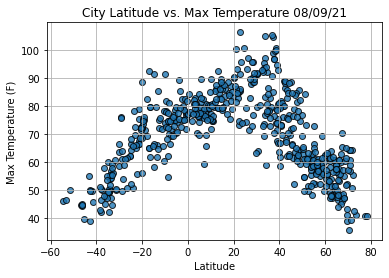

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

We can repurpose our code for the maximum temperature scatter plot and create a scatter plot for the latitude versus humidity.
- In addition to changing the y-axis variable to "humidity," we need to change the title to "Humidity," and the y-axis label to "Humidity (%)."

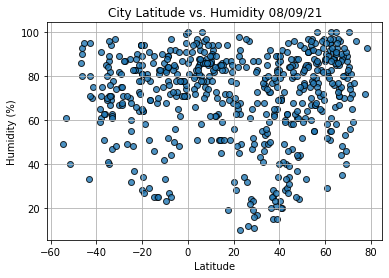

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

### 6.3.3 Plot Latitude vs Cloudiness 

Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."

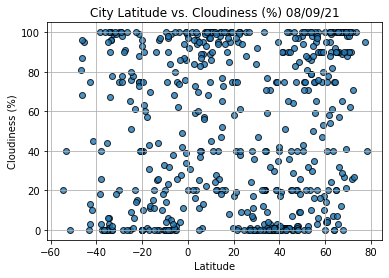

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

### 6.3.4 Plot Latitude vs. Wind Speed 

Now, we can create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."

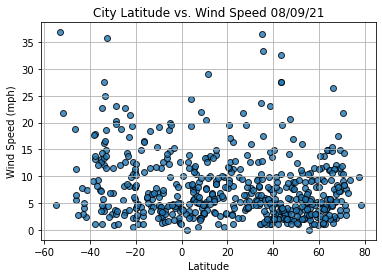

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### 6.4.2 Find Correlation B/w latitude and max temp

In [44]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-08-09 21:21:05
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    72.55
Humidity                       83
Cloudiness                     61
Wind Speed                   8.19
Name: 13, dtype: object

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,2021-08-09 21:22:54,37.4636,-122.4286,96.62,63,1,1.99
2,Albany,US,2021-08-09 21:25:16,42.6001,-73.9662,86.45,60,51,7.47
5,Pevek,RU,2021-08-09 21:25:17,69.7008,170.3133,38.93,81,100,10.51
9,Ransang,PH,2021-08-09 21:25:19,8.9603,117.5828,78.85,85,100,4.03
10,Coahuayana,MX,2021-08-09 21:25:19,18.7333,-103.6833,87.28,78,100,9.82
...,...,...,...,...,...,...,...,...,...
551,Lerwick,GB,2021-08-09 21:28:23,60.1545,-1.1494,57.20,95,95,11.34
552,Baykit,RU,2021-08-09 21:28:24,61.6700,96.3700,53.38,79,58,1.30
553,Harboore,DK,2021-08-09 21:28:24,56.6175,8.1807,59.99,83,97,9.17
555,Cacheu,GW,2021-08-09 21:28:25,12.2706,-16.1658,82.40,89,99,4.74


In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Half Moon Bay,US,2021-08-09 21:22:54,37.4636,-122.4286,96.62,63,1,1.99
2,Albany,US,2021-08-09 21:25:16,42.6001,-73.9662,86.45,60,51,7.47
5,Pevek,RU,2021-08-09 21:25:17,69.7008,170.3133,38.93,81,100,10.51
9,Ransang,PH,2021-08-09 21:25:19,8.9603,117.5828,78.85,85,100,4.03
10,Coahuayana,MX,2021-08-09 21:25:19,18.7333,-103.6833,87.28,78,100,9.82


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

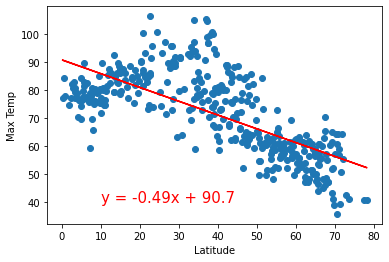

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

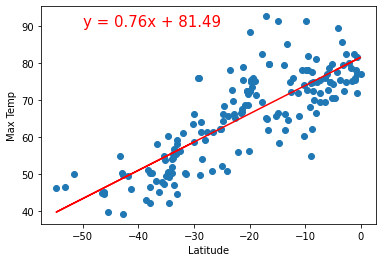

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

### 6.4.3 Find Correlation b/w latitude & % humidity 

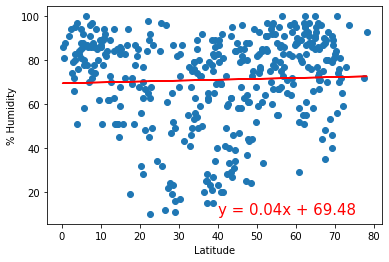

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

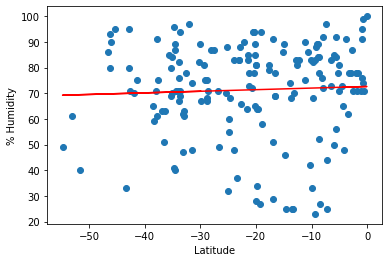

In [61]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 



### 6.4.4 Find Correlation b/w latitude & % Cloudiness 

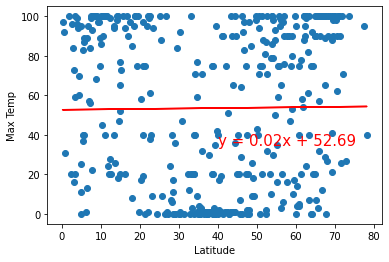

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(40, 35))

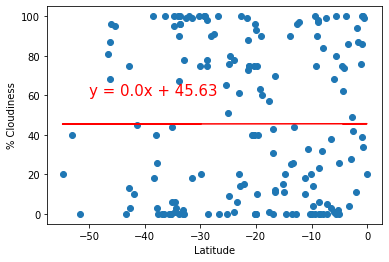

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

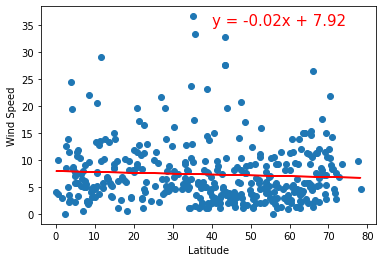

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

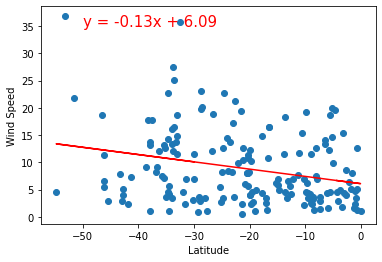

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))